In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
import random
import shutil
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from PIL import Image, ImageFilter
from skimage.util import random_noise

In [ ]:
#Função para aplicar zoom na imagem
def apply_zoom(image, zoom_factor):
    width, height = image.size
    new_width = int(width * zoom_factor)
    new_height = int(height * zoom_factor)
    resized_image = image.resize((new_width, new_height), Image.BICUBIC)
    left = (new_width - width) // 2
    top = (new_height - height) // 2
    cropped_image = resized_image.crop((left, top, left + width, top + height))
    return cropped_image


In [ ]:
#Função para aplicar o filtro gaussiano de blur na imagem
def apply_gaussian_blur(image):
    blurred_image = image.filter(ImageFilter.GaussianBlur(radius=2))
    return blurred_image


In [ ]:
#Função para adicionar ruído aleatório à imagem
def add_random_noise(image):
    np_image = np.array(image)
    noisy_image = random_noise(np_image)
    noisy_image = np.uint8(255 * noisy_image)
    return Image.fromarray(noisy_image)


In [ ]:
# Função para aplicar uma rotação na imagem
def apply_rotation(image, rotation_angle):
    rotated_image = image.rotate(rotation_angle, resample=Image.BICUBIC)
    return rotated_image

In [ ]:
# Função para aplicar flip na horizontal na imagem
def apply_horizontal_flip(image):
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    return flipped_image

Para cada pasta:

A semente aleatória da pasta é gerada para garantir a reprodutibilidade das transformações aplicadas a essa pasta específica.
Para cada imagem na pasta:

A imagem é carregada.
Com base nas porcentagens definidas, é determinado se a imagem será selecionada para cada transformação individual (rotação, flip, zoom, ruído, blur). Isso é feito usando números aleatórios e comparação com as porcentagens correspondentes.
Se a imagem for selecionada para uma transformação específica, a transformação será aplicada a ela.
Após cada transformação, a imagem é salva na pasta de saída com o nome modificado.

In [ ]:
main_dir = os.path.join("gdrive", "MyDrive", "IA901-2023S1", "data")

# Definir a pasta de entrada
input_dir = os.path.join(main_dir, "interim", "balanced")

# Definir a pasta de saída
output_dir = os.path.join(main_dir, "processed")

In [ ]:
# Definir as porcentagens e sementes
total_percentage = 0.8  # 80% das imagens serão selecionadas para transformação
rotation_percentage = 0.2  # 40% das imagens selecionadas serão rotacionadas
flip_percentage = 0.8  # 50% das imagens selecionadas terão flip na horizontal
rotation_range = (3, 30)  # Faixa de rotação em graus
random_seed = 42  # Semente para garantir repetibilidade
zoom_percentage = 0.5  # 20% das imagens selecionadas receberão zoom
zoom_range = (0.8, 1.2)  # Faixa de fator de zoom
noise_percentage = 0.4  # 20% das imagens selecionadas receberão ruído aleatório
blur_percentage = 0.4  # 20% das imagens selecionadas receberão blur

# Definir semente aleatória para garantir repetibilidade
random.seed(random_seed)
np.random.seed(random_seed)

# Criar a estrutura de pasta de saída
os.makedirs(output_dir, exist_ok=True)
train_output_dir = os.path.join(output_dir, "TRAIN")
os.makedirs(train_output_dir, exist_ok=True)

In [ ]:
# Percorrer todas as pastas
for folder_name in ["downdog", "goddess", "plank", "tree", "warrior2"]:
    # Obter o caminho completo para a pasta atual
    folder_path = os.path.join(input_dir, "TRAIN", folder_name)

    # Criar a pasta correspondente na pasta de saída
    output_folder_path = os.path.join(train_output_dir, folder_name)
    os.makedirs(output_folder_path, exist_ok=True)

    # Obter a lista de arquivos na pasta atual
    file_list = os.listdir(folder_path)

    # Definir a semente aleatória específica para cada pasta
    folder_random_seed = random.randint(1, 100)
    random.seed(folder_random_seed)
    np.random.seed(folder_random_seed)

    # Calcular o número de imagens para a transformação
    num_images = len(file_list)
    num_transformed_images = int(num_images * total_percentage)
    num_rotated_images = int(num_transformed_images * rotation_percentage)
    num_flipped_images = int(num_transformed_images * flip_percentage)
    num_zoomed_images = int(num_transformed_images * zoom_percentage)
    num_noisy_images = int(num_transformed_images * noise_percentage)
    num_blurred_images = int(num_transformed_images * blur_percentage)

    # Selecionar aleatoriamente as imagens para a transformação
    transformed_indices = random.sample(range(num_images), num_transformed_images)

    # Inicializar as listas para cada tipo de transformação
    rotated_indices = random.sample(transformed_indices, num_rotated_images)
    flipped_indices = random.sample(transformed_indices, num_flipped_images)
    zoomed_indices = random.sample(transformed_indices, num_zoomed_images)
    noisy_indices = random.sample(transformed_indices, num_noisy_images)
    blurred_indices = random.sample(transformed_indices, num_blurred_images)
    affine_indices = random.sample(transformed_indices, num_affine_images)
    bright_indices = random.sample(transformed_indices, num_bright_images)

    # Percorrer as imagens e aplicar as transformações necessárias
    for i, filename in enumerate(file_list):
        # Obter o caminho completo para o arquivo atual
        file_path = os.path.join(folder_path, filename)
        output_filename = filename

        # Carregar a imagem
        image = Image.open(file_path)
        # Definir a semente aleatória específica para cada imagem
        image_random_seed = random.randint(1, 100)
        random.seed(image_random_seed)
        np.random.seed(image_random_seed)

        # Verificar se a imagem precisa de rotação
        if i in rotated_indices:
            # Definir a semente aleatória específica para cada imagem
            image_random_seed = random.randint(1, 100)
            random.seed(image_random_seed)
            np.random.seed(image_random_seed)

            # Selecionar aleatoriamente um ângulo de rotação dentro da faixa especificada
            rotation_angle = random.randint(rotation_range[0], rotation_range[1])

            # Aplicar a rotação na imagem
            image = image.rotate(rotation_angle, expand=True)

            # Adicionar a marcação ao nome do arquivo
            output_filename = f"rotação_{output_filename}"

        # Verificar se a imagem precisa de flip na horizontal
        if i in flipped_indices:
            # Aplicar flip na horizontal na imagem
            image = image.transpose(Image.FLIP_LEFT_RIGHT)

            # Adicionar a marcação ao nome do arquivo
            output_filename = f"flip_{output_filename}"

        # Verificar se a imagem precisa de zoom
        if i in zoomed_indices:
            # Definir a semente aleatória específica para cada imagem
            image_random_seed = random.randint(1, 100)
            random.seed(image_random_seed)
            np.random.seed(image_random_seed)

            # Selecionar aleatoriamente um fator de zoom
            zoom_factor = random.uniform(zoom_range[0], zoom_range[1])

            # Aplicar o zoom na imagem
            image = apply_zoom(image, zoom_factor)

            # Adicionar a marcação ao nome do arquivo
            output_filename = f"zoom_{output_filename}"

        # Verificar se a imagem precisa de ruído aleatório
        if i in noisy_indices:
            # Aplicar ruído aleatório na imagem
            image = add_random_noise(image)

            # Adicionar a marcação ao nome do arquivo
            output_filename = f"ruído_{output_filename}"

        # Verificar se a imagem precisa de blur com filtro gaussiano
        if i in blurred_indices:
            # Aplicar o filtro gaussiano de blur na imagem
            image = apply_gaussian_blur(image)

            # Adicionar a marcação ao nome do arquivo
            output_filename = f"blur_{output_filename}"

        # Salvar a imagem com o nome modificado na pasta de saída
        output_file_path = os.path.join(output_folder_path, output_filename)
        image.save(output_file_path)

In [ ]:
shutil.copytree(input_dir, output_dir, dirs_exist_ok=True)

'gdrive/MyDrive/PROJETO/dataset_aug_30_rotation'

# Plots do conjunto de dados

In [ ]:
class ImageFolderWithPath(datasets.ImageFolder):
    def __getitem__(self, index):
        path, target = self.samples[index]
        img = self.loader(path)
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return img, target, path

In [ ]:
image_datasets = {x: ImageFolderWithPath(os.path.join(output_dir, x)) for x in ['TRAIN', 'VAL', 'TEST']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                              num_workers=2) for x in ['TRAIN', 'VAL', 'TEST']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['TRAIN', 'VAL', 'TEST']}
class_names = image_datasets['TRAIN'].classes

In [ ]:
from collections import Counter

dataset_classes = {x: dict(Counter(image_datasets[x].targets)) for x in ['TRAIN', 'VAL', 'TEST']}
dataset_classes

{'TRAIN': {0: 284, 1: 310, 2: 308, 3: 276, 4: 322},
 'VAL': {0: 40, 1: 29, 2: 48, 3: 26, 4: 31},
 'TEST': {0: 88, 1: 70, 2: 103, 3: 62, 4: 151}}

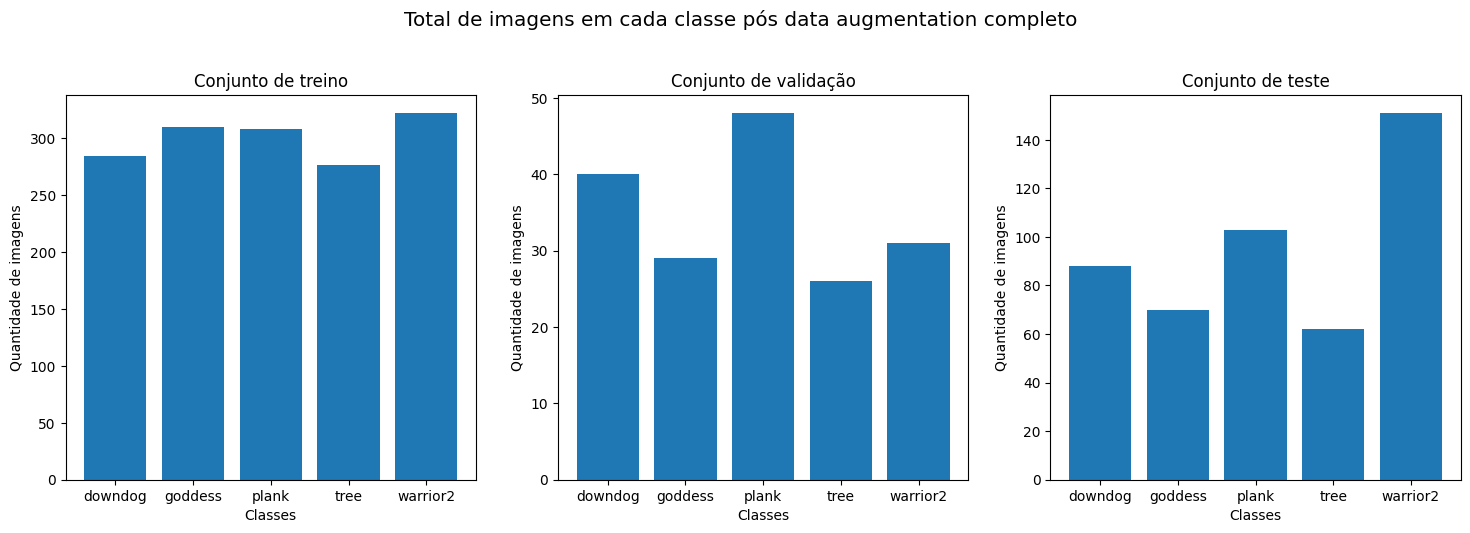

In [ ]:
values_train = list(dataset_classes["TRAIN"].values())
values_val = list(dataset_classes["VAL"].values())
values_test = list(dataset_classes["TEST"].values())

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Total de imagens em cada classe pós data augmentation completo", y=1.05, fontsize="x-large")

ax[0].set_title("Conjunto de treino")
ax[0].set_xlabel("Classes")
ax[0].set_ylabel("Quantidade de imagens")
ax[0].bar(range(len(dataset_classes["TRAIN"])), height=values_train, tick_label=class_names)

ax[1].set_title("Conjunto de validação")
ax[1].set_xlabel("Classes")
ax[1].set_ylabel("Quantidade de imagens")
ax[1].bar(range(len(dataset_classes["VAL"])), height=values_val, tick_label=class_names)

ax[2].set_title("Conjunto de teste")
ax[2].set_xlabel("Classes")
ax[2].set_ylabel("Quantidade de imagens")
ax[2].bar(range(len(dataset_classes["TEST"])), height=values_test, tick_label=class_names)

plt.show()